# 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 서울 유동인구 데이터 불러오기
people0 = "/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv"
people = pd.read_csv(people0)
people

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [3]:
# 데이터 날짜 정리
people = people[people['date']>='2020-01-20']
people

,date,hour,birth_year,sex,province,city,fp_num
136800,2020-01-20,0,20,female,Seoul,Dobong-gu,21740
136801,2020-01-20,0,20,male,Seoul,Dobong-gu,22110
136802,2020-01-20,0,20,female,Seoul,Dongdaemun-gu,28330
136803,2020-01-20,0,20,male,Seoul,Dongdaemun-gu,29610
136804,2020-01-20,0,20,female,Seoul,Dongjag-gu,32570
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [4]:
#$ 필요한 데이터 컬럼 정리
num_df = ['date', 'fp_num']
df = people[num_df]
df

,date,fp_num
136800,2020-01-20,21740
136801,2020-01-20,22110
136802,2020-01-20,28330
136803,2020-01-20,29610
136804,2020-01-20,32570
...,...,...
1084795,2020-05-31,27620
1084796,2020-05-31,56560
1084797,2020-05-31,38960
1084798,2020-05-31,25420


In [5]:
# date를 기준으로 유동인구 수 평균
please = df['fp_num'].groupby([df['date']]).mean()
pplease = pd.DataFrame(please)

# index reset
pplease.reset_index(inplace=True, drop=False)

pplease['fp_num']

0      28224.613889
1      28207.688889
2      28109.941667
3      27354.609722
4      24460.348611
           ...     
127    27679.594444
128    27668.033333
129    27617.121569
130    26343.631944
131    26159.236111
Name: fp_num, Length: 132, dtype: float64

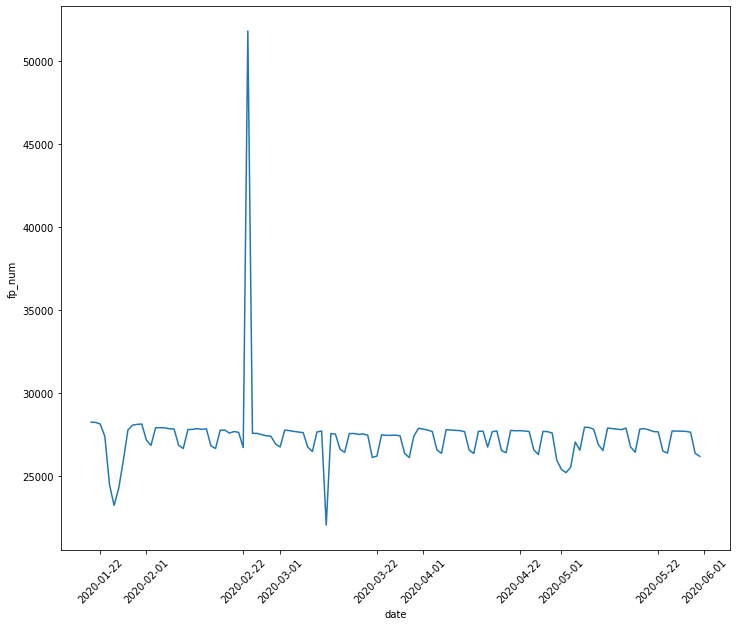

In [6]:
# 일일 유동인구 그래프화

plt.figure(figsize=(12,10))
plt.xticks(rotation = 45)
pplease['date'] = pd.to_datetime(pplease['date'])
sns.lineplot(data=pplease,x="date",y="fp_num")

In [7]:
# 확진자 정보 데이터 불러오기
patient = pd.read_csv('/content/drive/MyDrive/DATATHON01/해커톤 코로나 데이터셋/PatientInfo.csv')
seoul_patient = patient[patient['province']=='Seoul']

# 필요한 컬럼 정리
seoul_patient = seoul_patient[['city','confirmed_date']]
seoul_patient

,city,confirmed_date
0,Gangseo-gu,2020-01-23
1,Jungnang-gu,2020-01-30
2,Jongno-gu,2020-01-30
3,Mapo-gu,2020-01-30
4,Seongbuk-gu,2020-01-31
...,...,...
1307,Mapo-gu,2020-06-29
1308,Mapo-gu,2020-06-29
1309,Geumcheon-gu,2020-06-29
1310,etc,2020-06-29


In [8]:
# 확진 날짜를 기준으로 count를 통해 일일 확진자 파악하기
gu_confirm_count = seoul_patient.groupby(['confirmed_date']).count()

gu_confirm_count

,city
confirmed_date,
2020-01-23,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2020-06-25,17
2020-06-26,17
2020-06-27,14


In [9]:
# 앞의 유동인구 데이터와 동일하게 해주기 위해 날짜 기준일 변경
idx = pd.date_range('2020-01-20', '2020-05-29')

gu_confirm_count = pd.DataFrame(gu_confirm_count)
gu_confirm_count.index = pd.DatetimeIndex(gu_confirm_count.index)
gu_confirm_count = gu_confirm_count.reindex(idx)
gu_confirm_count

,city
2020-01-20,NaN
2020-01-21,NaN
2020-01-22,NaN
2020-01-23,1.0
2020-01-24,NaN
...,...
2020-05-25,8.0
2020-05-26,19.0
2020-05-27,25.0
2020-05-28,19.0


In [10]:
# 결측치 0으로 변경
gu_confirm_count = gu_confirm_count.replace(np.nan,0)
gu_confirm_count

,city
2020-01-20,0.0
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,1.0
2020-01-24,0.0
...,...
2020-05-25,8.0
2020-05-26,19.0
2020-05-27,25.0
2020-05-28,19.0


In [11]:
# index reset
gu_confirm_count.reset_index(inplace=True, drop=False)
gu_confirm_count

,index,city
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,1.0
4,2020-01-24,0.0
...,...,...
126,2020-05-25,8.0
127,2020-05-26,19.0
128,2020-05-27,25.0
129,2020-05-28,19.0


In [12]:
# index 컬럼명 date로 변환
gu_confirm_count = gu_confirm_count.rename(columns={'index':'date'})
gu_confirm_count

,date,city
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,1.0
4,2020-01-24,0.0
...,...,...
126,2020-05-25,8.0
127,2020-05-26,19.0
128,2020-05-27,25.0
129,2020-05-28,19.0


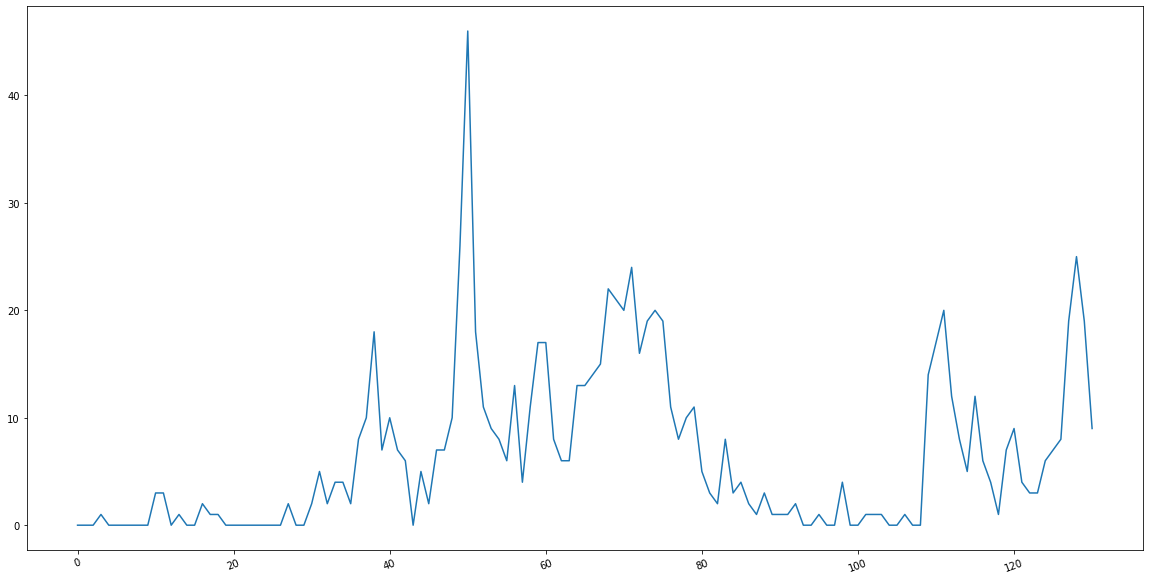

In [13]:
# 일별 코로나 확진자 수 그래프화
x = gu_confirm_count.index
y = gu_confirm_count['city']

plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.plot(x,y)
plt.show()

In [14]:
# 데이터 병합
pplease_count_seoul = pd.merge(pplease, gu_confirm_count, on='date')

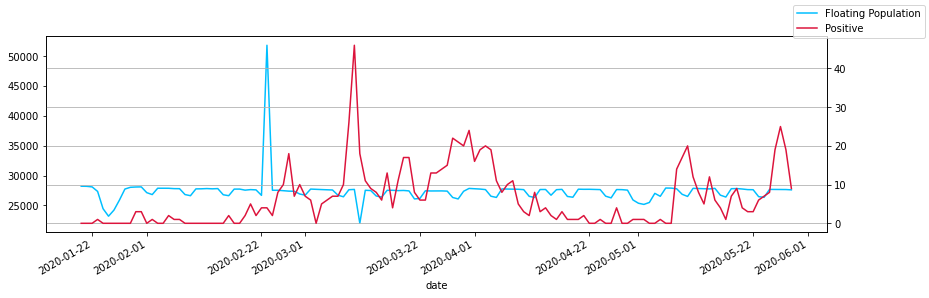

In [15]:
# 서울시 기준 일일 유동인구 및 코로나 확진자 그래프
abc = pplease_count_seoul

plt.rcParams["figure.figsize"] = (14,4)

ax = abc.plot(x="date", y="fp_num",legend=False,label='Floating Population',color="deepskyblue")
ax2 = ax.twinx()

abc.plot(x='date', y="city", ax=ax2, legend=False,label='Positive', color="crimson")
ax.figure.legend()

plt.grid()
# 2020-2-23일 갑작스럽게 유동인구가 폭증함. 그 이유를 찾아보니 전광훈 목사가 주최한 광화문 집회의 영향이 있어보인다.

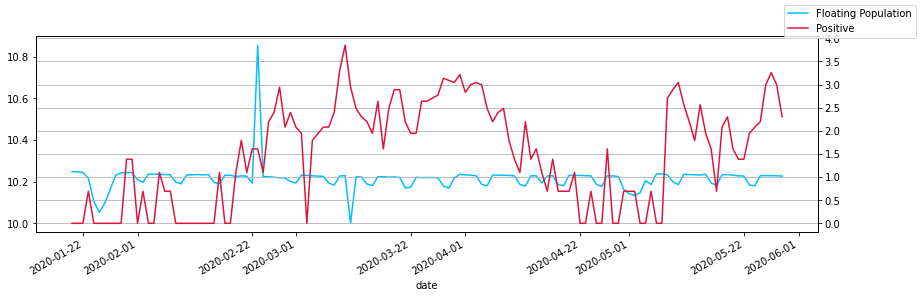

In [16]:
# 서울시 기준 일일일 유동인구 및 코로나 확진자 그래프
# 데이터의 값들의 차이가 많이나 시각적으로 확인했을때 차이가 많이 발생
# 로그화 해준다.

abc = pplease_count_seoul

abc["log_fp_num"] = np.log1p(abc["fp_num"])
abc["log_city"] = np.log1p(abc["city"])

plt.rcParams["figure.figsize"] = (14,4)

ax = abc.plot(x="date", y="log_fp_num",legend=False,label='Floating Population',color="deepskyblue")
ax2 = ax.twinx()

abc.plot(x='date', y="log_city", ax=ax2, legend=False,label='Positive', color="crimson")
ax.figure.legend()

plt.grid()
# 2020-2-23일 갑작스럽게 유동인구가 폭증함. 그 이유를 찾아보니 전광훈 목사가 주최한 광화문 집회의 영향이 있어보인다.